<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/16_Okt_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install mlxtend

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.datasets import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from mlxtend.plotting import plot_decision_regions
import sklearn.tree as tree

In [17]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv')

In [18]:
df.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


In [38]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [39]:
X = df[['radius_mean', 'concave points_mean']]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

model = DecisionTreeClassifier(max_depth=3, random_state=1)

roc_cros = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
acc = accuracy_score(y_train, y_pred)

y_score = model.predict_proba(X_train)[:, 1]

roc = roc_auc_score(y_train, y_score)


train_roc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print('Cros ROC AUC', np.mean(roc_cros))
print('Cross STD', np.std(roc_cros))
print('Train ROC AUC', train_roc)
print('Test ROC AUC', test_roc)
print()
print('Acc', acc)
print('ROC AUC', roc)

Cros ROC AUC 0.9415376676986584
Cross STD 0.03820098345101102
Train ROC AUC 0.968998968008256
Test ROC AUC 0.90625

Acc 0.9384615384615385
ROC AUC 0.968998968008256


In [40]:
X = df[['radius_mean', 'concave points_mean']]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

model = DecisionTreeClassifier(max_depth=3, random_state=1, criterion='entropy')

roc_cros = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
acc = accuracy_score(y_train, y_pred)

y_score = model.predict_proba(X_train)[:, 1]

roc = roc_auc_score(y_train, y_score)


train_roc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print('Cros ROC AUC', np.mean(roc_cros))
print('Cross STD', np.std(roc_cros))
print('Train ROC AUC', train_roc)
print('Test ROC AUC', test_roc)
print()
print('Acc', acc)
print('ROC AUC', roc)

Cros ROC AUC 0.94453044375645
Cross STD 0.029292481669421045
Train ROC AUC 0.9785552115583076
Test ROC AUC 0.9646164021164021

Acc 0.9296703296703297
ROC AUC 0.9785552115583076


Cros ROC AUC 0.9442208462332301
Cross STD 0.02994661517745263
Train ROC AUC 0.9771826625386997
Test ROC AUC 0.9646164021164021

Acc 0.9230769230769231
ROC AUC 0.9771826625386997


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


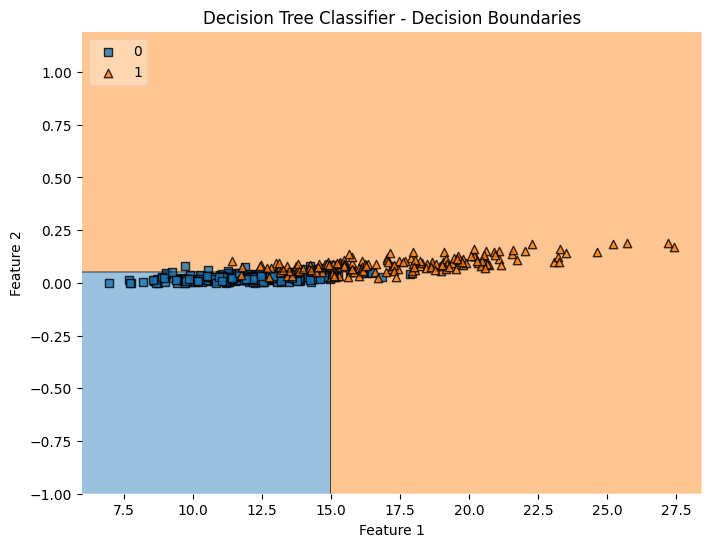

In [58]:
X = df[['radius_mean', 'concave points_mean']]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

model = DecisionTreeClassifier(max_depth=3,
                               random_state=1,
                               criterion='log_loss',
                               min_impurity_decrease=0.01,
                               splitter='best')

roc_cros = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
acc = accuracy_score(y_train, y_pred)

y_score = model.predict_proba(X_train)[:, 1]

roc = roc_auc_score(y_train, y_score)


train_roc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print('Cros ROC AUC', np.mean(roc_cros))
print('Cross STD', np.std(roc_cros))
print('Train ROC AUC', train_roc)
print('Test ROC AUC', test_roc)
print()
print('Acc', acc)
print('ROC AUC', roc)

plt.figure(figsize=(8, 6))
plot_decision_regions(np.array(X_train), y_train.values, clf=model, legend=2)
plt.title("Decision Tree Classifier - Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [59]:
from sklearn import show_versions
show_versions()


System:
    python: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-6.1.85+-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.5.2
          pip: 24.1.2
   setuptools: 71.0.4
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: 3.0.11
       pandas: 2.2.2
   matplotlib: 3.7.1
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Haswell

       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.27.so
        version: 0.3.27
threading_layer: pthreads
   architecture: Haswell

       user